In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [108]:
train = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/04.%20Week%204/Feature%20Engineering%20Datasets/train.csv"
test = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/04.%20Week%204/Feature%20Engineering%20Datasets/test.csv"

train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

In [100]:
df = pd.read_csv(train)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [101]:
df = pd.read_csv(test)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [102]:
train_df.head()

print("Missing Values Train.csv:")
print(train_df.isnull().sum())

print("\nMissing Values Test.csv:")
print(test_df.isnull().sum())

train_df.describe()

Missing Values Train.csv:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Missing Values Test.csv:
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


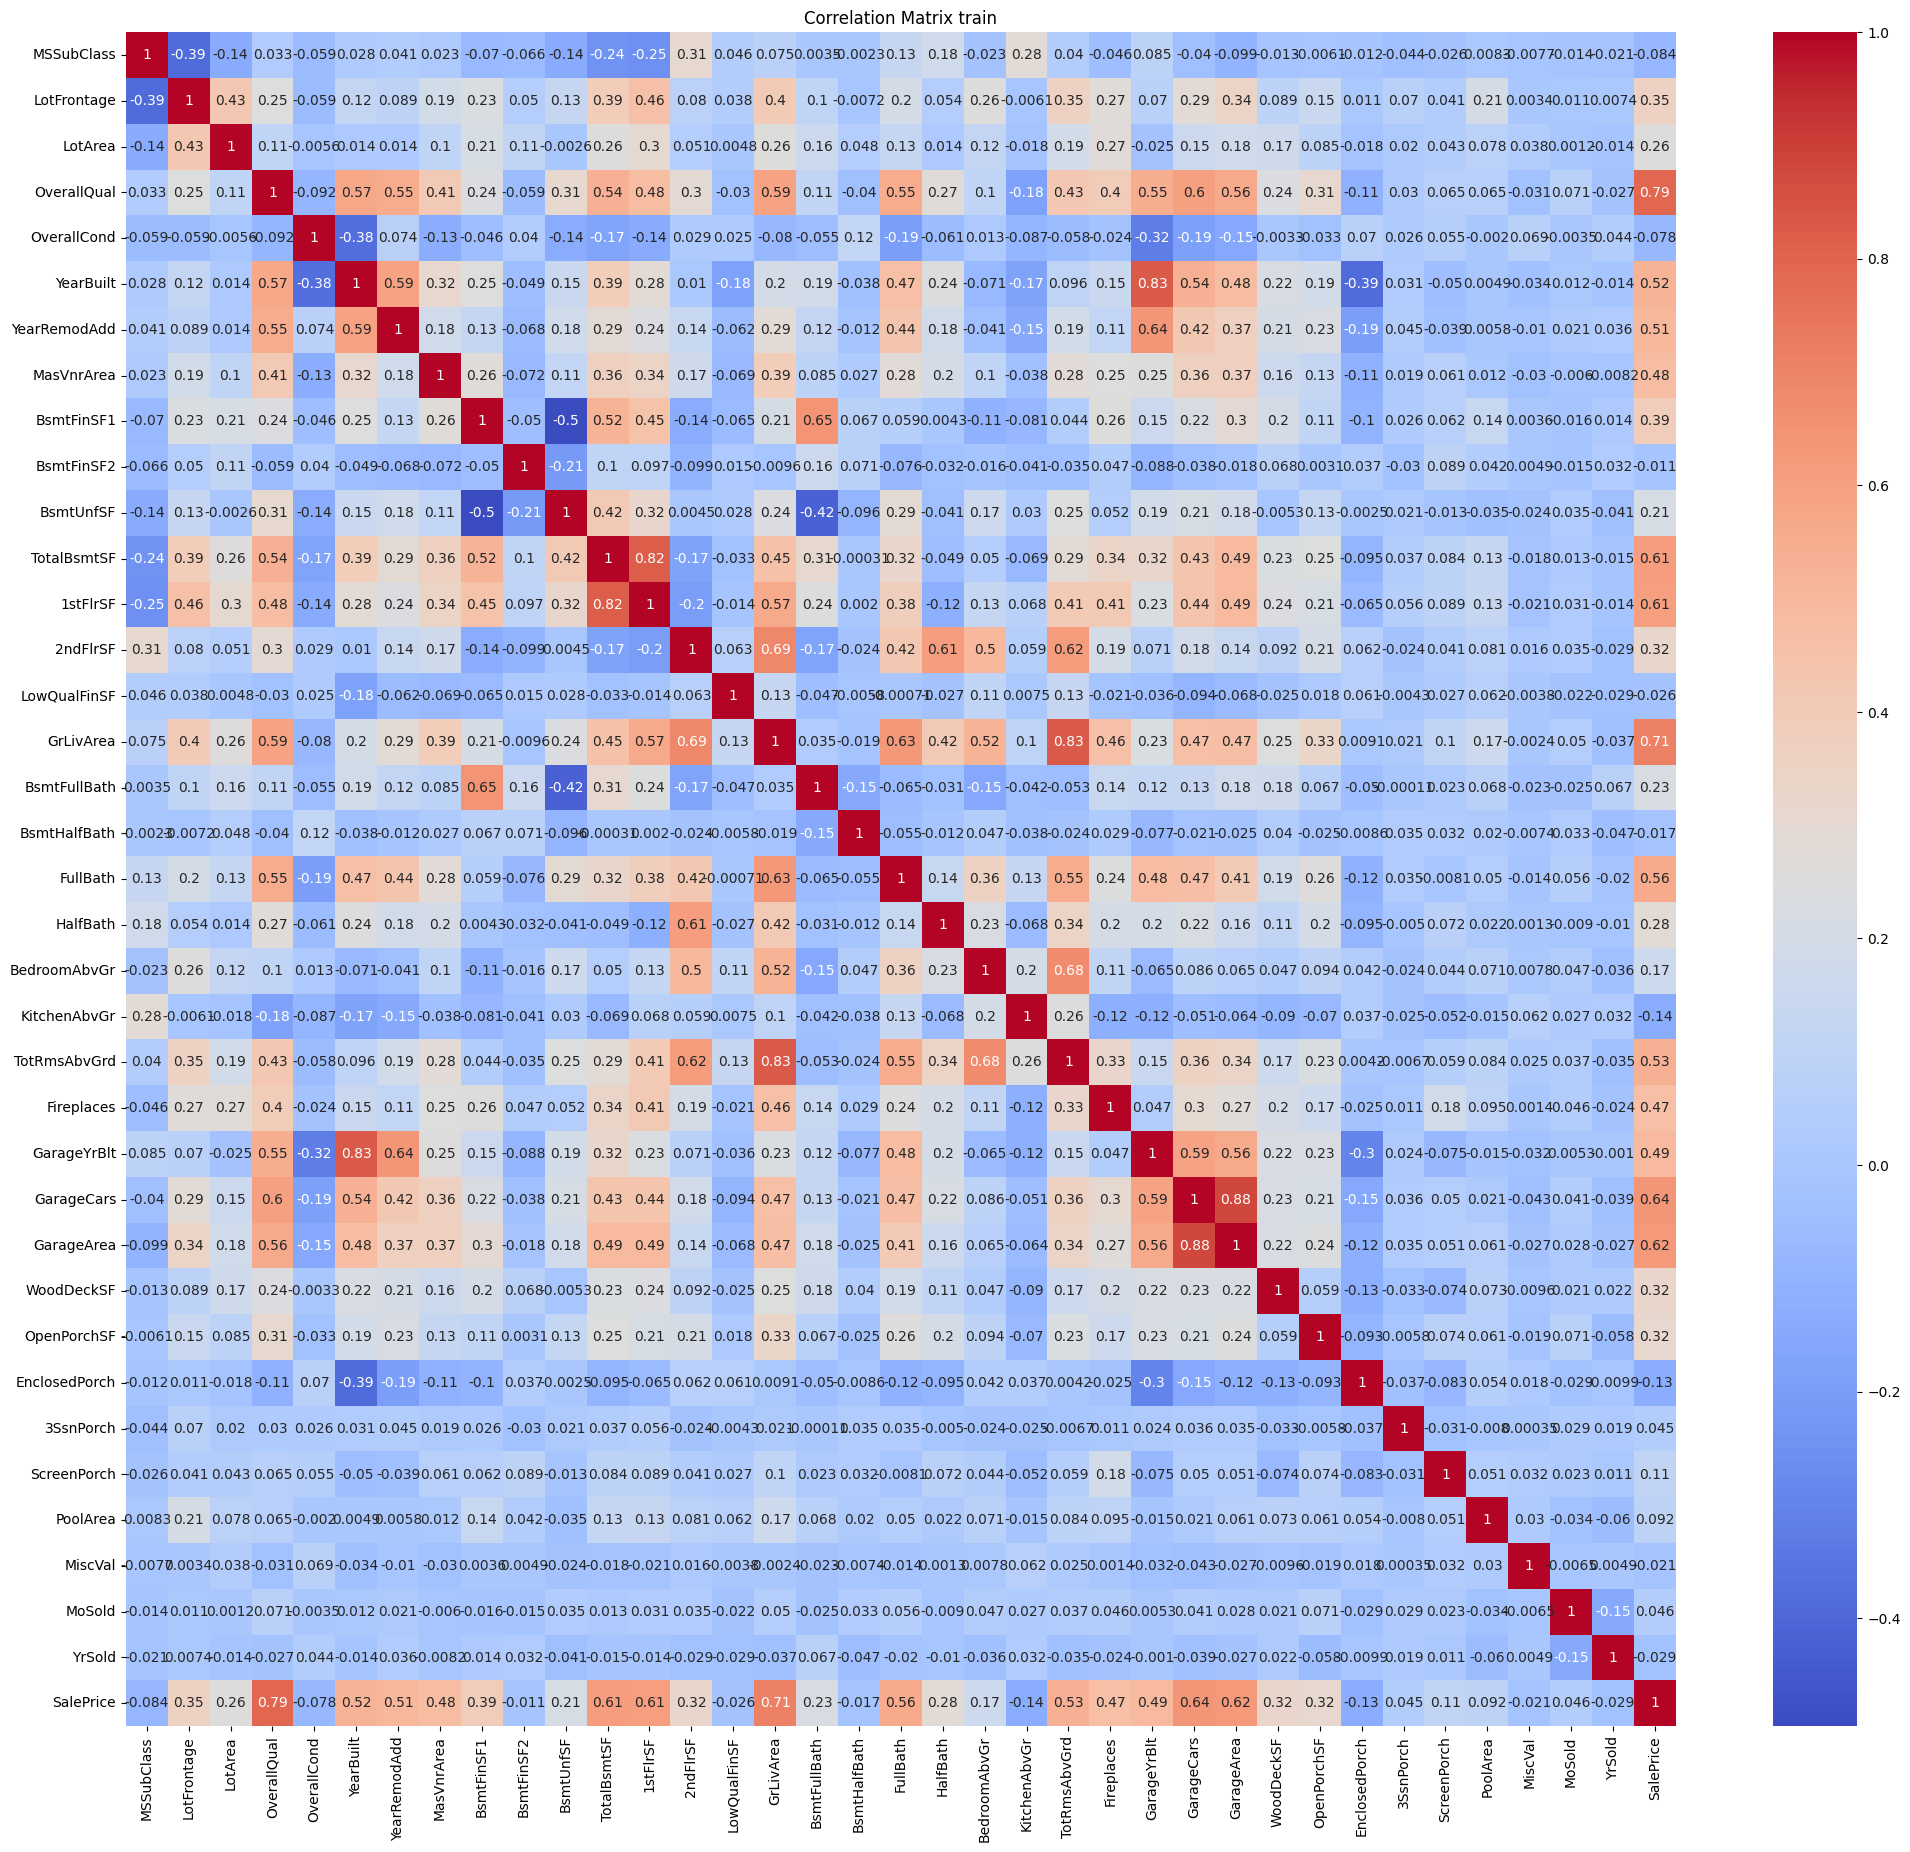

In [103]:
numeric_df = train_df.select_dtypes(include=np.number)

plt.figure(figsize=(25, 22))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix train")
plt.show()

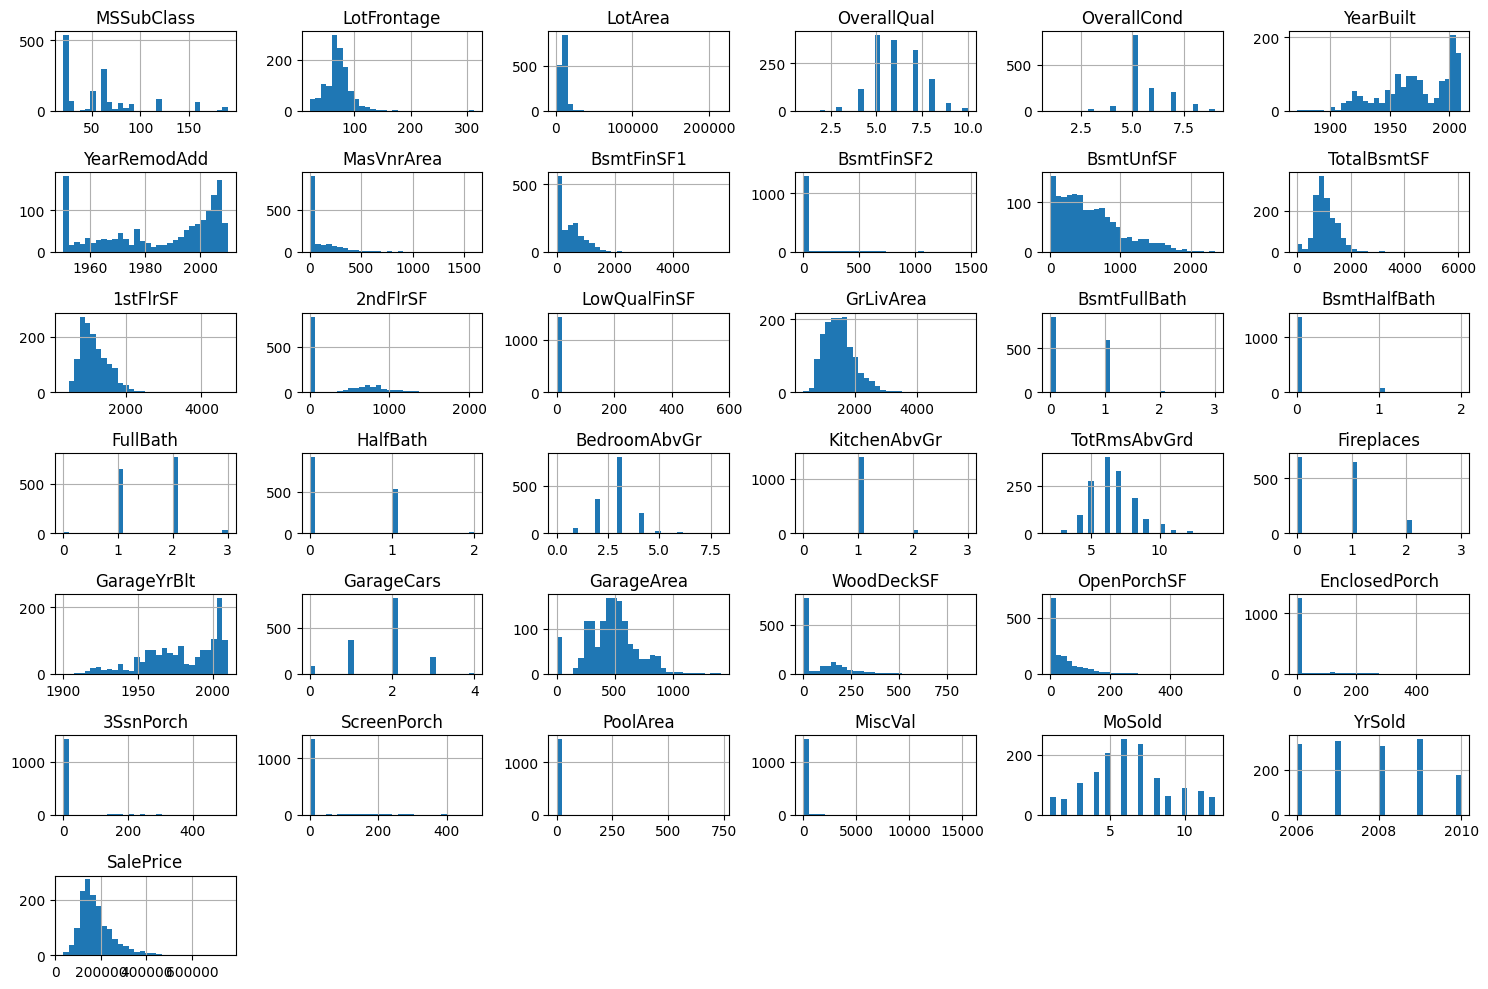

In [104]:
train_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

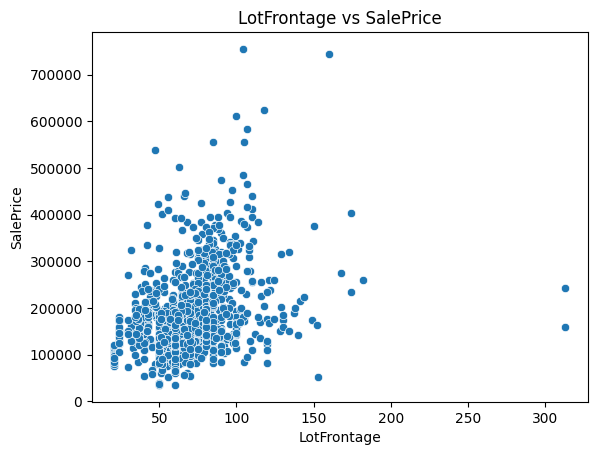

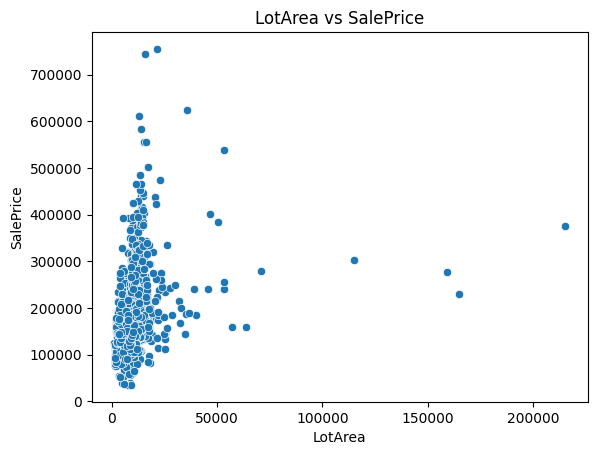

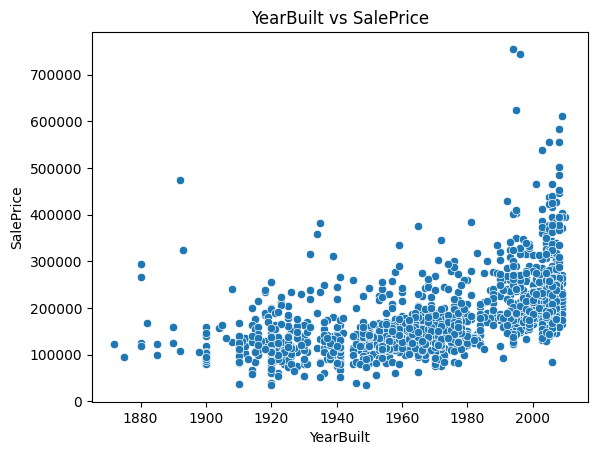

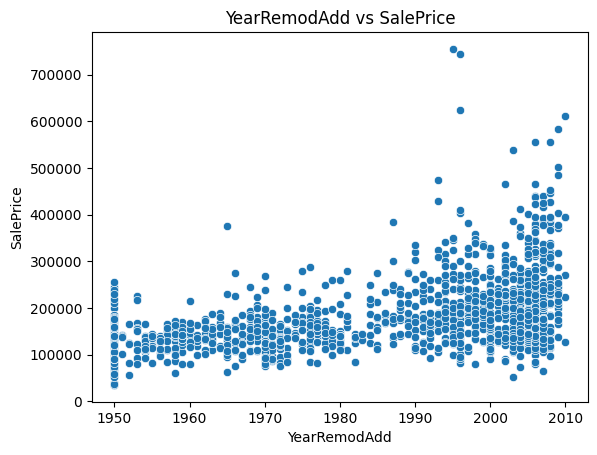

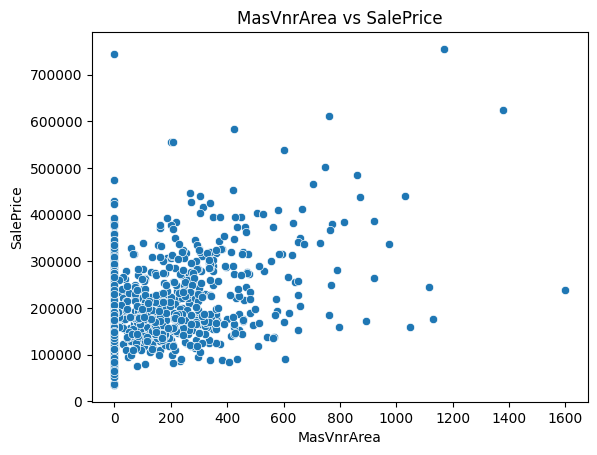

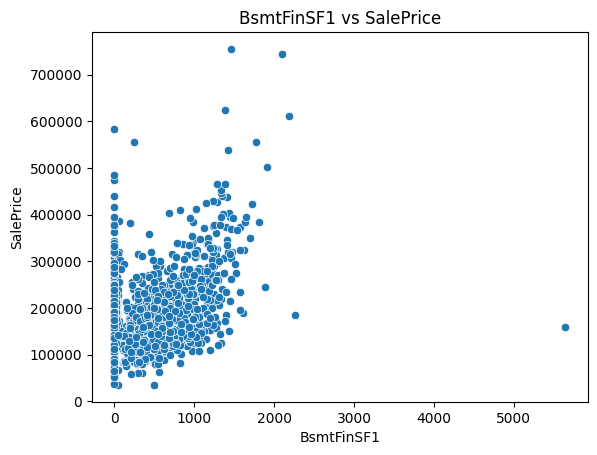

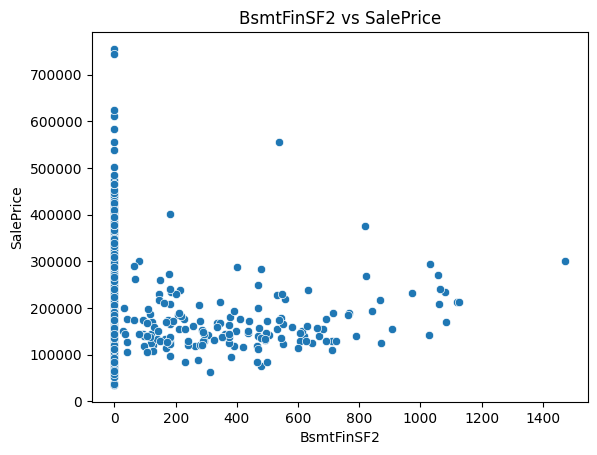

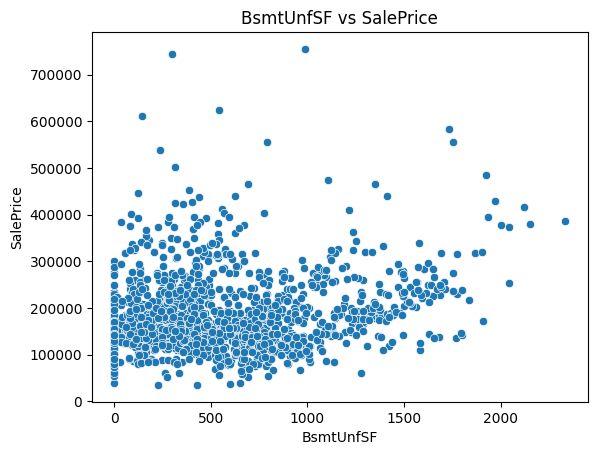

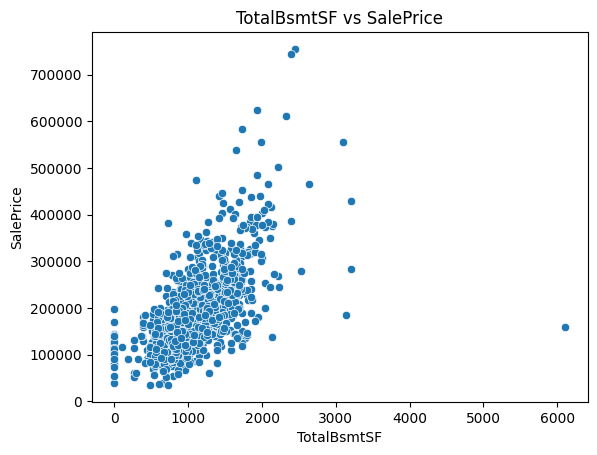

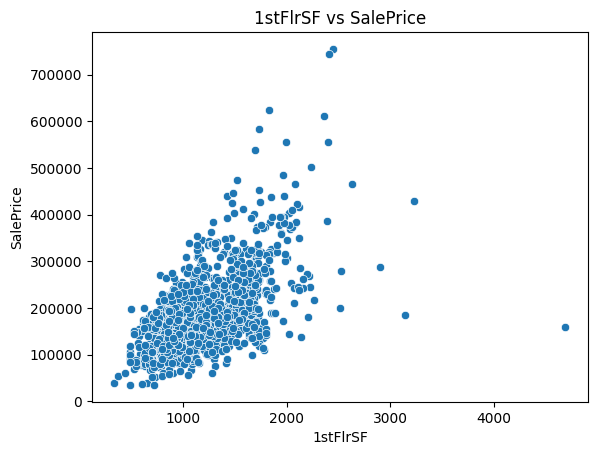

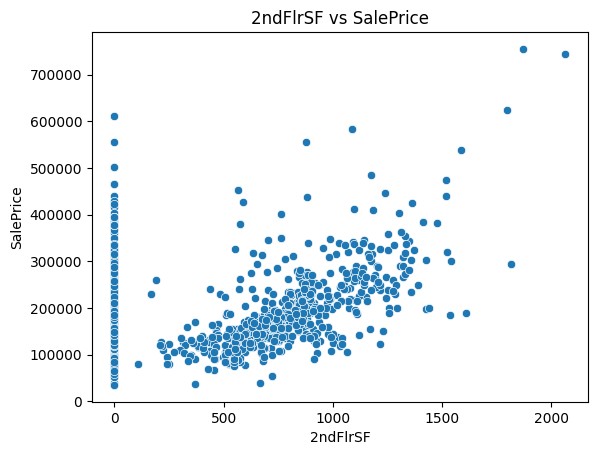

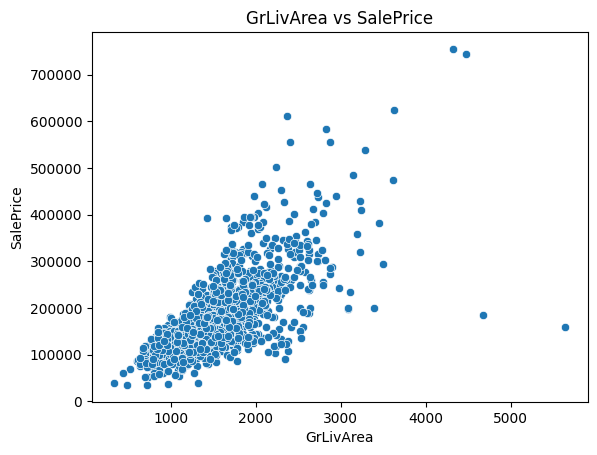

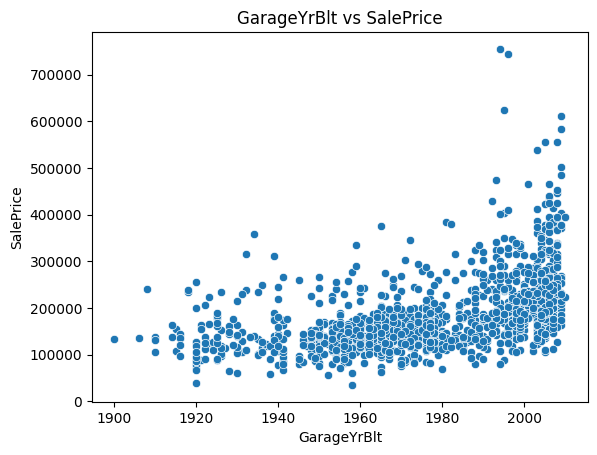

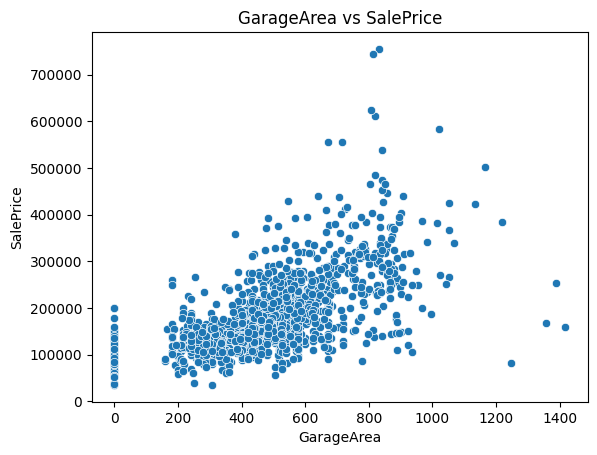

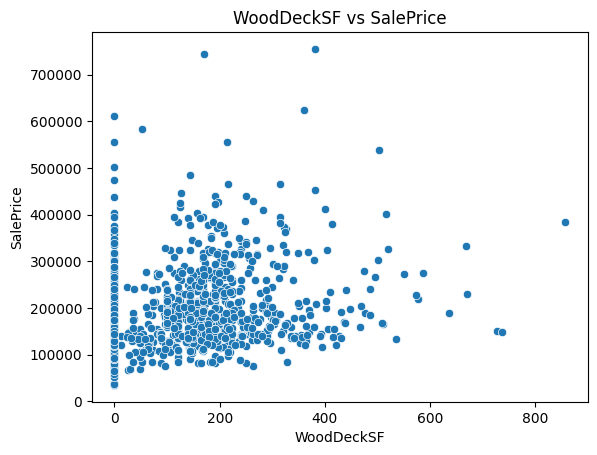

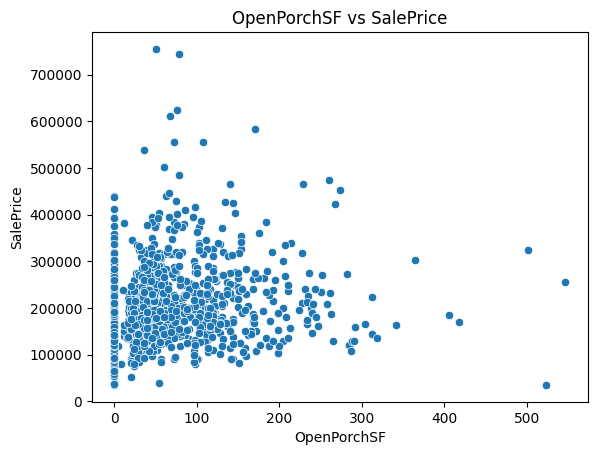

In [105]:
columns_to_plot = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
                   'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
                   'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

for col in columns_to_plot:
    sns.scatterplot(data=train_df, x=col, y='SalePrice')
    plt.title(f"{col} vs SalePrice")
    plt.show()

In [109]:
print("Kolom saat ini di train_df:")
print(train_df.columns.tolist())

numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_features = train_df.select_dtypes(exclude=np.number).columns.tolist()

for col in numerical_features:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].median())

for col in categorical_features:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

categorical_features_existing = [col for col in categorical_features if col in train_df.columns and col in test_df.columns]

train_df = pd.get_dummies(train_df, columns=categorical_features_existing)
test_df = pd.get_dummies(test_df, columns=categorical_features_existing)

train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

print("Train columns:", train_df.shape)
print("Test columns :", test_df.shape)

Kolom saat ini di train_df:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Screen

In [115]:
X = train_df.drop(columns=['SalePrice', 'Id'])
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")


MSE: 873658179.21
RMSE: 29557.71
Mean Absolute Error (MAE): 18266.65
R-squared (R²): 0.8861


# **1. Mean Squared Error (MSE)**
MSE mengukur rata-rata kuadrat dari selisih antara nilai aktual dan nilai prediksi.

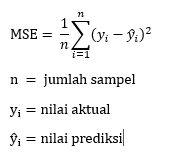

MSE menunjukkan seberapa besar kesalahan yang dibuat oleh model secara rata-rata. Nilai yang lebih kecil menunjukkan model yang lebih akurat.

# **2. Root Mean Squared Error (RMSE)**
RMSE adalah akar dari MSE, digunakan untuk mendapatkan nilai dalam satuan yang sama dengan target variabel.

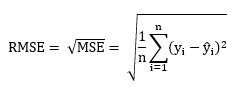

RMSE lebih mudah diinterpretasikan dibandingkan MSE karena nilainya dalam satuan yang sama dengan target variabel.

# **3. Mean Absolute Error (MAE)**
Mean Absolute Error (MAE) adalah salah satu metrik evaluasi untuk model regresi, yang mengukur seberapa besar rata-rata kesalahan absolut antara nilai prediksi dan nilai sebenarnya.

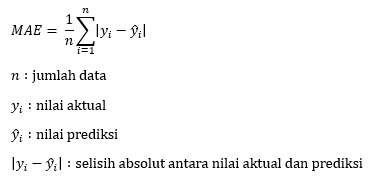

# **4. R-Squared**
R-Squared mengukur seberapa baik model dapat menjelaskan variasi dalam data.

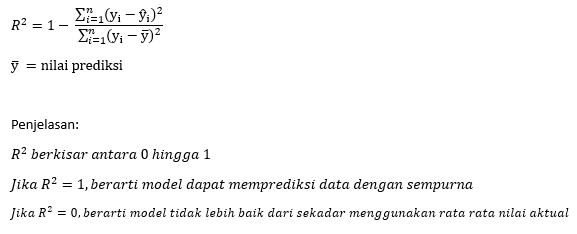

